In [120]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import scatter
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import collections 

In [121]:
'''
gives distance of a point from origin
'''

def dis(x):
    return x[0]**2+x[1]**2

In [146]:
'''
Creating vitual instance of data for DBSCAN clustering 
'''
data = []
for i in range(500):
    x = (np.random.randint(-10,10,2))
    if dis(x)<25 or dis(x)>64:
        data.append(x)
x = np.random.randint(15,16,2)
data.append(x)
data = pd.DataFrame(data)
print('dimension of data= ',data.shape)

dimension of data=  (346, 2)


Visualization of data


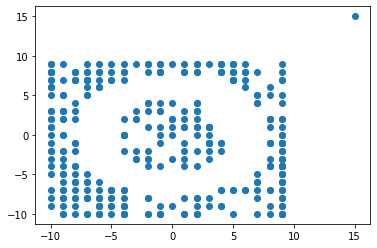

In [147]:
'''
visualising the data
'''
print('Visualization of data')
scatter(data[0],data[1])

In [148]:
'''
Making data suitable for modeling
'''
data = data.values

In [149]:
'''
gives Euclidian distance between two points
x = first point
y = second point
'''

def distance(x,y):
    return (np.sqrt(np.sum((x-y)**2)))

In [141]:
'''
for a given point i cluster all the point in range epsilon
i = data point
data = data for clustering
epsilon = distance under which we have to locate the points
minpts = minimum number of point for a poit to become core point
cluster = cluster 
candidate = candidate set
'''

def expand(i,data,epsilon,minpts,cluster,candidate=None):
    k = max(cluster)
    k = k+1
    if candidate==None:
        candidate =[i]
    
    for seed in candidate:
        #print(seed)
        for j in range(len(data)):
            if cluster[j]<=0:
                d = distance(data[seed],data[j])
                if d < epsilon:
                    candidate.append(j)

        if len(candidate)<minpts and cluster[j]==0:
            cluster[j]=-1
            return cluster
        for point in candidate:
            cluster[point] = k
    return cluster

In [150]:
'''
perform DBSCAN on the data
data = data for clustering
epsilon = distance under which we have to locate the points
minpts = minimum number of point for a poit to become core point
'''

def DBSCAN(data,epsilon,minpts):
    n = len(data)
    cluster = np.zeros(n)
    for i in range(len(data)):
        if cluster[i]==0:
            cluster = expand(i,data,epsilon,minpts,cluster)
    return cluster

In [151]:
'''
making cluster of data
'''
cluster = DBSCAN(data,3,5)
print('cluster =',collections.Counter(cluster))

cluster = Counter({1.0: 279, 2.0: 66, -1.0: 1})


# Applying KMedoids on Virtual data with dimension 2 (for visualisation purpose)

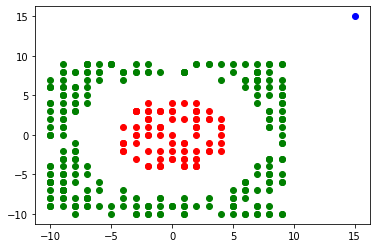

In [145]:
color = ['b','g','r','y','c','k','m']
fig = plt.figure()
lst1 = np.unique(cluster)
ax  = fig.add_subplot(111)
for i in range(len(lst1)):
    lst = []
    col = color[i]
    for j in range(len(data)):
        if cluster[j]==lst1[i]:
            lst.append(data[j])
    lst = pd.DataFrame(lst)
    ax.scatter(lst[0],lst[1],c=col)
    #break
plt.show()